<a href="https://colab.research.google.com/github/ShenChikai/Aritificial-Intelligence/blob/main/Reinforcement_Learning_(DQN)_for_Stock_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning with DQN for Stock Trading 🧮
Credit to Nicholas Renotte at https://www.youtube.com/channel/UCHXa4OpASJEwrHrLeIzw7Yg for basic knowledge in OpenAI Gym

# Install dependencies and Import Packages
* Tensorflow 
* Stable Baseliens
* OpenAI Gym (anytrading)
* FinTA

In [ ]:
# Install dependencies
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 8.3 kB/s 
     |████████████████████████████████| 412.3 MB 29 kB/s 
     |████████████████████████████████| 240 kB 44.4 MB/s 
     |████████████████████████████████| 171 kB 58.0 MB/s 
     |████████████████████████████████| 503 kB 47.4 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 3.8 MB 35.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9ed807cec7190699c05d56fd934cd51972cb98ac51131419411ac16a748403b4
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [ ]:
# Install dependencies for FinTa for financial indicators
!pip install finta

In [ ]:
# Import lib
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import DQN

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data Cleaning for stock dataset of APPLE (Stock Ticker symbol: AAPL) with Pandas
1. Download the stock data of APPLE from 05/03/2021 to 04/15/2022 here: 

> https://www.marketwatch.com/investing/stock/aapl/downloaddatapartial?startdate=05/03/2021%2000:00:00&enddate=04/15/2022%2000:00:00&daterange=d30&frequency=p1d&csvdownload=true&downloadpartial=false&newdates=false

2. Rename the downloaded scv file to "APPLE.csv"

3. Upload the scv file to colab for the next step

In [ ]:
# Acquire GameStop Data from marketwatch.com with pandas
df = pd.read_csv('APPLE.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,04/14/2022,170.62,171.27,165.04,165.29,"75,329,375"
1,04/13/2022,167.39,171.04,166.77,170.40,"70,618,930"
2,04/12/2022,168.02,169.87,166.64,167.66,"79,265,188"
3,04/11/2022,168.71,169.03,165.50,165.75,"72,246,711"
4,04/08/2022,171.78,171.78,169.20,170.09,"76,575,516"


In [ ]:
# Parse data
# Convert date col to datetime type
df['Date'] = pd.to_datetime(df['Date'])
# Set date as index
df.set_index('Date', inplace = True)
# Resort data from oldest to newest
df.sort_values('Date', ascending=True, inplace = True)
# Recase volume type to float from string
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',','')))
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-03,132.04,134.07,131.83,132.54,75135102.0
2021-05-04,131.19,131.49,126.70,127.85,137564703.0
2021-05-05,129.20,130.45,127.97,128.10,84000898.0
2021-05-06,127.89,129.75,127.13,129.74,78128328.0
2021-05-07,130.85,131.26,129.48,130.21,78973273.0


# Create OpenAI Gym Environment to Visualize a Period for Demo

In [ ]:
# Create OpenAI Gym env
# frame_bound = time frame from day 5 to day 200
# window size = #relative data taken into account to make trade
env = gym.make('stocks-v0',df=df,frame_bound=(5,200),window_size=5)

info {'total_reward': -8.93000000000005, 'total_profit': 0.46302316106573077, 'position': 0}


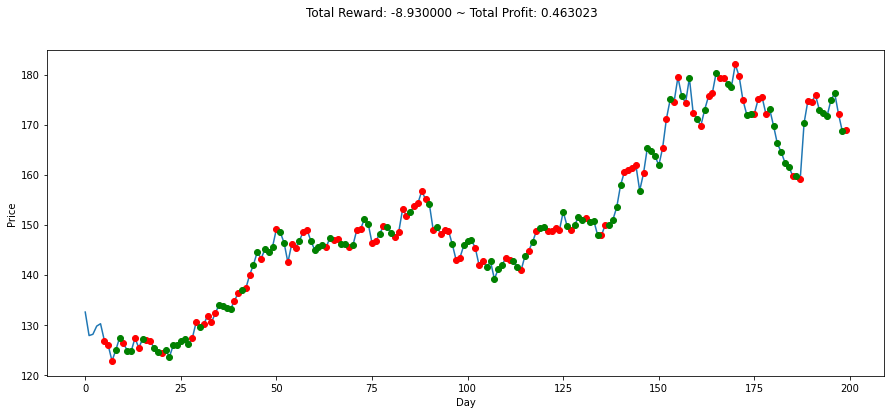

In [ ]:
# Start env
state = env.reset()
while True:
  # Available actions are Buy and Sell
  action = env.action_space.sample() # sample for random action
  # step takes an action and returns (observation, reward, done, info)
  n_state, reward, done, info = env.step(action)
  if done:
    print(f'info {info}')
    break

# Visualize env
plt.figure(figsize=(15,6))
plt.cla()
plt.ylabel('Price')
plt.xlabel('Day')
env.render_all()
plt.show()

# Build Financial Indicators and Set up Customized Environment Class for Reinforce Learning with DQN later
> Involved Financial Indicatros:

1. Simple Moving Average (SMV)
> the average price over the specified period of time (set to 12 days in this proejct).

2. Relative Strength Index (RSI)
> A momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.

3. On-balance Volume (OBV)
> A momentum indicator of volume changes. It shows crowd sentiment that can predict a bullish or bearish outcome.





In [ ]:
# Import technical analysis library
from gym_anytrading.envs import StocksEnv
from finta import TA
# Calculate financial indicators
# Simple moving average with 12-day period
df['SMA'] = TA.SMA(df, 12)
# Relative strength index
df['RSI'] = TA.RSI(df)
# On-balance volume
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace = True)
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-05-03,132.04,134.07,131.83,132.54,75135102.0,0.000000,0.000000,0.0
2021-05-04,131.19,131.49,126.70,127.85,137564703.0,0.000000,0.000000,-137564703.0
2021-05-05,129.20,130.45,127.97,128.10,84000898.0,0.000000,5.428882,-53563805.0
2021-05-06,127.89,129.75,127.13,129.74,78128328.0,0.000000,31.645035,24564523.0
2021-05-07,130.85,131.26,129.48,130.21,78973273.0,0.000000,37.032284,103537796.0
2021-05-10,129.41,129.54,126.81,126.85,88071234.0,0.000000,23.047677,15466562.0
2021-05-11,123.50,126.27,122.77,125.91,126142797.0,0.000000,20.693316,-110676235.0
2021-05-12,123.40,124.64,122.25,122.77,112172305.0,0.000000,15.132457,-222848540.0
2021-05-13,124.58,126.15,124.26,124.97,105861297.0,0.000000,29.439535,-116987243.0


In [ ]:
def add_signals(env):
  start = env.frame_bound[0] - env.window_size    # 5
  end = env.frame_bound[1]               # 200
  prices = env.df.loc[:,'Low'].to_numpy()[start:end]  # Set prices to low
  # Set signal features as 'Low', 'Volume', 'SMA', 'RSI', 'OBV'
  signal_features = env.df.loc[:, ['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end]
  return prices, signal_features

class CustomEnv(StocksEnv):
  _process_data = add_signals

custom_env = CustomEnv(df=df,frame_bound=(10,100),window_size=10)

In [ ]:
# Create dummy env with stable_baselines
# env making function
env_maker = lambda: custom_env
env = DummyVecEnv([env_maker])

# Set up and Train Deep Q Network (DQN) with Stable Baselines Package
* The DQN package is provided in Stable Baselines: https://stable-baselines.readthedocs.io/en/master/modules/dqn.html
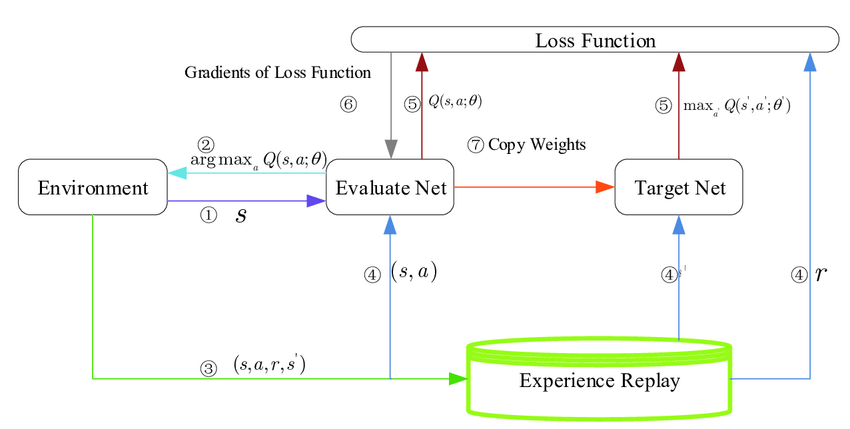
> Reference: Deep Reinforcement Learning-Empowered Resource Allocation for Mobile Edge Computing in Cellular V2X Networks - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/DQN-algorithm-frame-diagram_fig2_348384317 [accessed 16 Apr, 2022]

In [ ]:
# Setting up Deep Q Network (DQN) with LnMlpPolicy 
# : Policy object that implements DQN policy, using a MLP (2 layers of 64), with layer normalisation
model = DQN('LnMlpPolicy', env, verbose=1)

# Train Reinforcement Learning model
model.learn(total_timesteps=25000)

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | 7.7      |
| steps                   | 8811     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | 13.7     |
| steps                   | 17711    |
--------------------------------------


# Evaluation of the Reinforcement Learning Model (DQN Model)

Info: {'total_reward': 22.590000000000003, 'total_profit': 1.0565900779292858, 'position': 1}


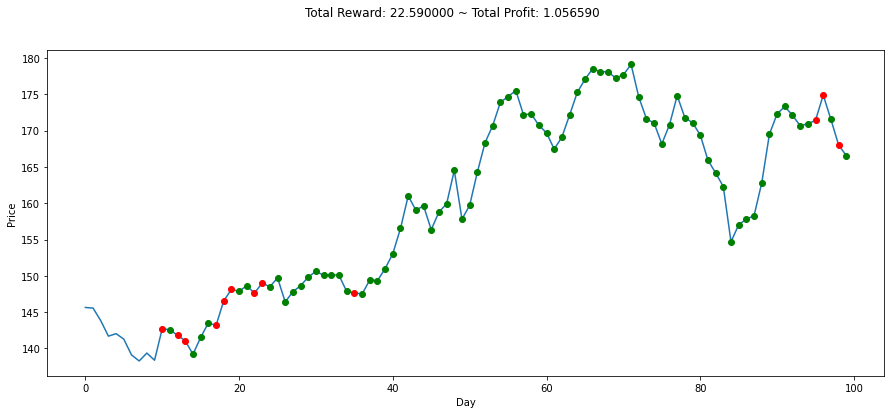

In [ ]:
# Evaluation with predictions from DQN model trained on day 110 to day 200
eval_env = CustomEnv(df=df,frame_bound=(110,200),window_size=10)
obs = eval_env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs, rewards, done, info = eval_env.step(action)
  if done:
    print(f'Info: {info}')
    break

# Visualize eval_env
plt.figure(figsize=(15,6))
plt.cla()
plt.ylabel('Price')
plt.xlabel('Day')
eval_env.render_all()
plt.show()

# Result and Discussion
> From above, Profit Margin is calculated as:
* Profit Margin = (Total Profit) - 1 * 100% <br>

> In my trial of execution, the profit margin is calculated to be **5.6%**, which is pretty good for this simple model. <br>
> To improve the learning process, other fianncial indicators could be added for more perspectives and steep market shocks could be avoided in the data for a more smooth prediction.

